In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [168]:
dataloc = '.\ELECGEN_20220518-052640.csv'
g_performance = pd.read_csv(dataloc, encoding = "ISO-8859-1")
dataloc = '.\ELECUSE_20220531-085730.csv'
g_consumption = pd.read_csv(dataloc, encoding = "ISO-8859-1")

In [169]:
g_performance.head()


,Country,Technology,Grid connection,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Solar photovoltaic,On-grid,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.99,2.26,2.26,15.58
1,Afghanistan,Solar thermal energy,On-grid,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Onshore wind energy,On-grid,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,Offshore wind energy,On-grid,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Albania,Solar photovoltaic,On-grid,0.0,0.14,0.27,0.27,0.27,0.27,0.27,...,0.54,0.77,0.92,1.03,1.19,1.43,1.36,1.20,1.33,22.20


In [170]:
g_consumption.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,703.908401,698.369914,686.728057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,185.515814,181.128875,186.199010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,Electric power consumption (kWh per capita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,219.253483,280.214482,312.228895,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
g_performance.drop(columns = ["Technology", "Grid connection"])

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.99,2.26,2.26,15.58
1,Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Albania,0.0,0.14,0.27,0.27,0.27,0.27,0.27,0.27,0.27,...,0.54,0.77,0.92,1.03,1.19,1.43,1.36,1.20,1.33,22.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Zambia,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
884,Zimbabwe,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.71,5.52
885,Zimbabwe,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
886,Zimbabwe,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [172]:
grouped = g_performance.groupby("Country")

In [173]:
g_performance = grouped.sum()

In [174]:
g_performance.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.99,2.26,2.26,15.58
Albania,0.0,0.14,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.41,0.54,0.77,0.92,1.03,1.19,1.43,1.36,1.20,1.33,22.20
Algeria,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,103.12,193.23,192.54,196.83,148.21,134.40,186.11,133.11,133.11
American Samoa,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,1.41,2.42,2.36,2.49,3.13,3.74,3.74,3.74
Andorra,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.24,0.26,0.51,0.56,0.72


In [175]:
g_consumption.rename(columns = {'Country Name': 'Country'}, inplace = True)
years = list(g_performance.columns)
years = ["Country"]+ years
print(years)

['Country', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [176]:
g_consumption = g_consumption[years]
g_consumption.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,780.702624,743.916044,769.080854,774.334166,777.672091,780.851052,789.487840,796.901936,760.576897,...,740.417655,740.741606,703.908401,698.369914,686.728057,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,116.708798,119.051133,133.754417,123.896644,138.893764,145.325051,144.984987,158.419738,154.500732,...,165.065621,175.112546,185.515814,181.128875,186.199010,NaN,NaN,NaN,NaN,NaN
4,Angola,75.264660,82.616571,86.018839,95.853114,87.535341,109.295219,144.715323,133.267258,172.384898,...,206.454402,207.013351,219.253483,280.214482,312.228895,NaN,NaN,NaN,NaN,NaN


In [177]:
df = pd.merge(g_performance, g_consumption, how='inner', on=['Country'])

In [178]:
df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
170           Uruguay
171        Uzbekistan
172           Vanuatu
173            Zambia
174          Zimbabwe
Name: Country, Length: 175, dtype: object

In [180]:
years = years[1:16]
print(years)

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


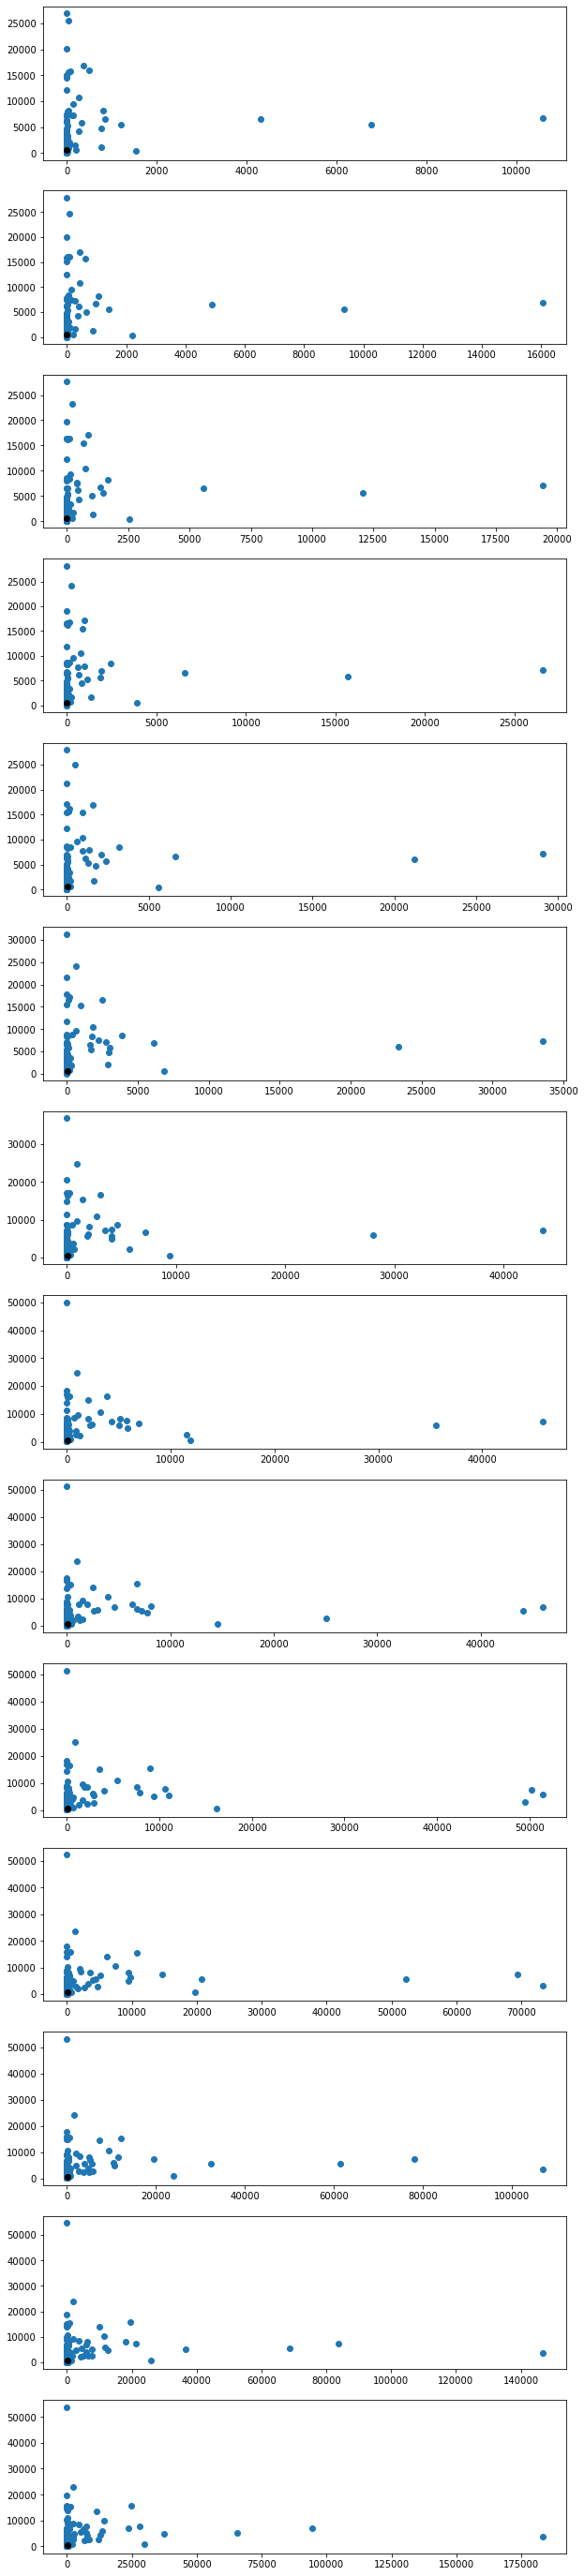

In [181]:
fig, ax = plt.subplots(len(years), 1, figsize= (10,50))
for i in range(len(years)):
    points = ax[i].scatter(df[years[i] + "_x"], df[years[i] + "_y"])
    points = ax[i].scatter(df[df["Country"]=="Philippines"][years[i] +"_x"], df[df["Country"]=="Philippines"][years[i] + "_y"], color = "black")
